Dataset Shape: (100, 4)
Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicate Entries: 0
Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        Customer ID         Age  Annual Income  Spending Score
count   100.000000  100.000000     100.000000      100.000000
mean     50.500000   43.930000   72406.290000       51.640000
std      29.011492   15.209151   29172.344091       28.856146
min       1.000000   18.000000   20563.000000        1.000000
25%      25.750000   29.750000   45342.750000       25.750000
50%      50.500000   44.000000   79277.000000       53.000000
75%      75.250000   58.250000   92703.500000       78.000000
max     100.000000   69.000000  119624.000000       99.000000


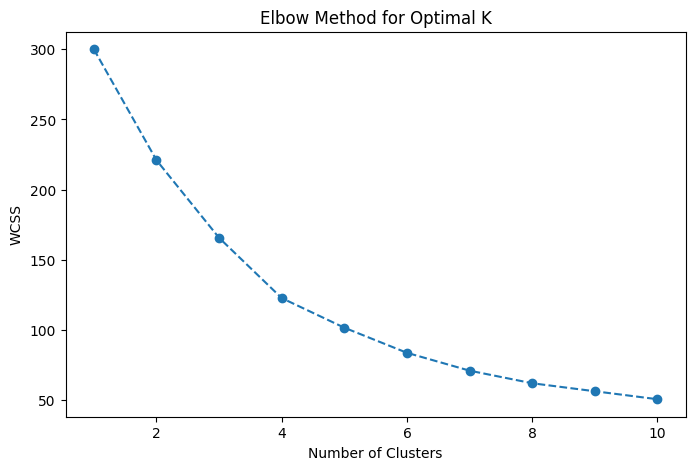

Silhouette Score: 0.3213651065082122


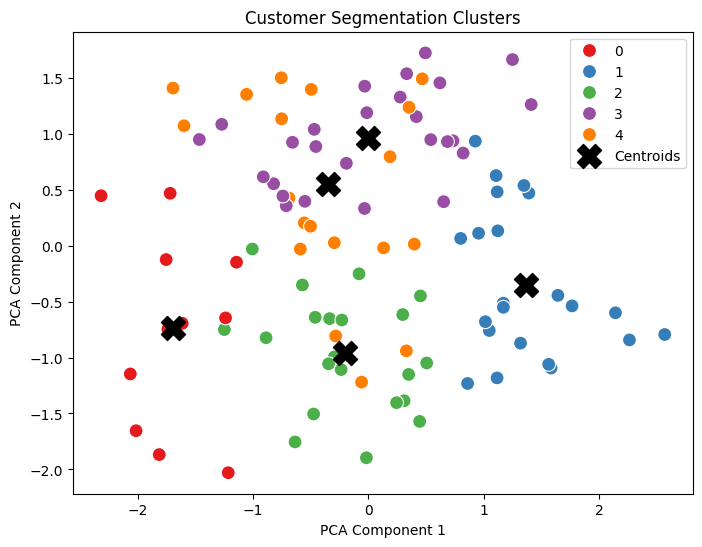

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
df = pd.read_csv("customer_data.csv")

# Inspect dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Entries:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

# Step 2: Data Preprocessing
# Selecting relevant features
features = ["Age", "Annual Income", "Spending Score"]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine the Optimal Number of Clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose optimal k from the elbow method (example: k=5)
k_optimal = 5

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Compute silhouette score
sil_score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", sil_score)

# Step 5: Visualization
# PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="Set1", s=100)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Clusters")
plt.legend()
plt.show()

# Save clustered dataset
df.to_csv("customer_segments.csv", index=False)
